In [6]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import os
import scvi
import matplotlib.pyplot as plt
os.chdir("/data")
import rpy2
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
adata = sc.read_h5ad("h5ad/batch_corrected.h5ad")

In [8]:
adata=adata.raw.to_adata()

In [9]:
adata=adata[adata.obs["annot"]=="Macrophages"]

In [10]:
adata.layers["counts"]=adata.X.copy()

/tmp/ipykernel_10672/2556140991.py:1: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"]=adata.X.copy()


In [11]:
scvi.data.poisson_gene_selection(adata, layer='counts', n_top_genes=6000, subset=True, batch_key="sample_id") # selecting HVGs using poisson sampling

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

Sampling from binomial...:   0%|          | 0/10000 [00:00<?, ?it/s]

In [12]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=25)
sc.tl.umap(adata, min_dist=0.1)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=0.3)

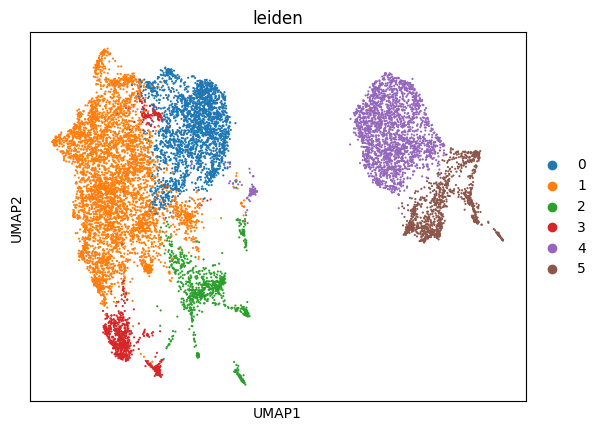

In [13]:
sc.pl.umap(adata, color="leiden")

In [15]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [16]:
adata.write_h5ad("h5ad/subtyping/macrophages.h5ad")

In [17]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon", pts=True, use_raw=False)
df=sc.get.rank_genes_groups_df(adata, group=None)

In [18]:
df.to_csv("csv/subtyping/wilcox_markers_macrophages.csv")

In [19]:
annot = {"0": "TAM",
         "1": "TAM",
         "2": "TAM",
         "3": "M1",
         "4": "TAM",
         "5": "TAM"}

In [20]:
adata.obs["annot"]=adata.obs["leiden"].map(annot)

In [21]:
adata.write_h5ad("h5ad/subtyping/macrophages.h5ad")